### Assignment Submission - Asset Pricing
> Student Name : Ankit Rawat

> Batch : G2 

In [18]:
### Import Libraries

In [19]:
import pandas as pd
import random
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import datetime
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplot, scatter, plot, axis
from scipy.stats import linregress
import seaborn as sns
import plotly.figure_factory as ff
import plotly.graph_objs as go
import scipy.stats as stats

In [20]:
### Setup Allignment

In [ ]:
pd.set_option("display.notebook_repr_html", False)
pd.set_option("display.max_columns", 12)
pd.set_option("display.width", 110)
pd.set_option("precision", 3)
pd.set_option("max_rows", 10)
pd.set_option("min_rows", 3)

%matplotlib inline

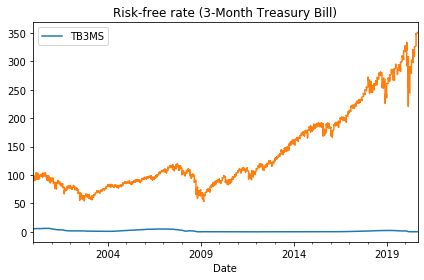

In [3]:
import pandas_datareader.data as web
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
start1 = datetime.date(2000, 1, 1)
end1 = datetime.date(2020, 9, 1)


# download the data 
rf = web.DataReader('TB3MS', 'fred', start=start1, end=end1)
mkt = web.DataReader("SPY", "yahoo", start1, end1)
mkt = mkt.iloc[1:,-1]

rf.plot(title='Risk-free rate (3-Month Treasury Bill)')
mkt.plot()
plt.tight_layout()
# plt.savefig('images/ch4_im3.png')
plt.show()

In [ ]:
rf_new = rf.reset_index()
mkt_new = mkt.reset_index()
rf_quarterly = rf_new.groupby(pd.PeriodIndex(rf_new["DATE"],freq = "Q"),axis = 0).mean()
mkt_quarterly = mkt_new.groupby(pd.PeriodIndex(mkt_new["Date"],freq = "Q"), axis = 0).mean()
rf_quarterly, mkt_quarterly

In [4]:
rf_new.mean()

TB3MS    1.58747
dtype: float64

> ## 1. Load Data

In [12]:
data  = pd.read_csv("Industry_Portfolios.csv")
c = ["FB","GOOGL","NVDA","MA","ADBE","NFLX","QCOM","CRM","GILD","CL"]
c = []
for x in ["FB","GOOGL","NVDA","MA","ADBE","NFLX","QCOM","CRM","GILD","CL"]:
    j =  web.DataReader(x,"yahoo","01-01-2000")
    c.append(j)


In [13]:
c

[                  High         Low        Open       Close     Volume  \
 Date                                                                    
 2012-05-18   45.000000   38.000000   42.049999   38.230000  573576400   
 2012-05-21   36.660000   33.000000   36.529999   34.029999  168192700   
 2012-05-22   33.590000   30.940001   32.610001   31.000000  101786600   
 2012-05-23   32.500000   31.360001   31.370001   32.000000   73600000   
 2012-05-24   33.209999   31.770000   32.950001   33.029999   50237200   
 ...                ...         ...         ...         ...        ...   
 2020-11-09  292.579987  278.529999  289.869995  278.769989   25117700   
 2020-11-10  274.000000  264.000000  273.100006  272.429993   29067700   
 2020-11-11  278.399994  272.480011  273.470001  276.480011   14957000   
 2020-11-12  279.750000  274.429993  277.179993  275.079987   12899500   
 2020-11-13  277.760010  273.100006  277.720001  276.950012   10391200   
 
              Adj Close  
 Date     

> Data Wragling
>> Verify any null data
>> Date formating 
>> Create copy 

In [23]:
data.isnull().sum()
data["Date"] = pd.to_datetime(data['Date'],format='%Y%m')
df  = data.copy()
df.set_index( "Date", inplace =True)

> ### 2.Calculate mean returns

In [24]:
R = pd.DataFrame(df.mean())
R_array = np.array(R)

In [25]:
print ("Expected Mean of the given data is :\n {} ".format(R))

Expected Mean of the given data is :
            0
NoDur  0.903
Durbl  0.733
Manuf  1.013
Enrgy  1.231
HiTec  0.766
Telcm  0.881
Shops  0.916
Hlth   0.784
Utils  0.907
Other  0.489 


> ### 3. Calculate covariance matrix of returns for the ten industry portfolios

In [26]:
Covmatrix = df.cov()
print ("Convariance of the given data is :\n {} ".format(Covmatrix))

Convariance of the given data is :
         NoDur   Durbl   Manuf   Enrgy   HiTec   Telcm   Shops    Hlth   Utils   Other
NoDur  11.193  18.450  14.105  10.531  12.923  11.968  10.171   9.953   7.867  14.438
Durbl  18.450  69.921  39.178  27.020  35.467  27.491  27.445  16.824  12.746  39.362
Manuf  14.105  39.178  28.199  23.145  24.619  19.550  17.623  13.596  11.441  26.313
Enrgy  10.531  27.020  23.145  36.985  19.267  15.367  11.298   9.630  14.027  18.320
HiTec  12.923  35.467  24.619  19.267  28.957  18.708  17.837  13.254  10.304  23.855
Telcm  11.968  27.491  19.550  15.367  18.708  19.787  14.169  11.507  10.992  19.611
Shops  10.171  27.445  17.623  11.298  17.837  14.169  16.759  10.179   6.694  19.227
Hlth    9.953  16.824  13.596   9.630  13.254  11.507  10.179  14.343   7.475  14.865
Utils   7.867  12.746  11.441  14.027  10.304  10.992   6.694   7.475  13.703   9.993
Other  14.438  39.362  26.313  18.320  23.855  19.611  19.227  14.865   9.993  31.164 


> ### 4. Standard Deviation 

In [27]:
Std_Deviation = np.sqrt(np.diagonal(Covmatrix).round(2))
print ("Std_Deviation of the given data is :\n {} ".format(Std_Deviation))

Std_Deviation of the given data is :
 [3.34514574 8.36181798 5.31036722 6.08111832 5.38144962 4.44859528
 4.0938979  3.78681925 3.7013511  5.58211429] 


> ### 4. Validate covariance is Symmetric and positive definite 

In [28]:
Covmatrix_array = np.array(Covmatrix)
Covmatrix_inverse = np.linalg.inv(Covmatrix_array) 
print ( " Covariance matrix is Symmetric : \n {}".format(Covmatrix - Covmatrix_array))
print ("\n")
print ( " Covariance matrix is Invertible : \n {}".format(Covmatrix_array.dot(Covmatrix_inverse).round(2)))

 Covariance matrix is Symmetric : 
        NoDur  Durbl  Manuf  Enrgy  HiTec  Telcm  Shops  Hlth  Utils  Other
NoDur    0.0    0.0    0.0    0.0    0.0    0.0    0.0   0.0    0.0    0.0
Durbl    0.0    0.0    0.0    0.0    0.0    0.0    0.0   0.0    0.0    0.0
Manuf    0.0    0.0    0.0    0.0    0.0    0.0    0.0   0.0    0.0    0.0
Enrgy    0.0    0.0    0.0    0.0    0.0    0.0    0.0   0.0    0.0    0.0
HiTec    0.0    0.0    0.0    0.0    0.0    0.0    0.0   0.0    0.0    0.0
Telcm    0.0    0.0    0.0    0.0    0.0    0.0    0.0   0.0    0.0    0.0
Shops    0.0    0.0    0.0    0.0    0.0    0.0    0.0   0.0    0.0    0.0
Hlth     0.0    0.0    0.0    0.0    0.0    0.0    0.0   0.0    0.0    0.0
Utils    0.0    0.0    0.0    0.0    0.0    0.0    0.0   0.0    0.0    0.0
Other    0.0    0.0    0.0    0.0    0.0    0.0    0.0   0.0    0.0    0.0


 Covariance matrix is Invertible : 
 [[ 1.  0. -0. -0.  0.  0. -0. -0. -0. -0.]
 [ 0.  1. -0. -0.  0.  0.  0. -0. -0.  0.]
 [ 0.  0.  1. 

> ###  5.Create Matrix  : e = (1....1)'

In [29]:
e = pd.DataFrame([1] * len( df.columns))
e  = np.array(e)
print ( "e Matrix :  \n {}".format(e))

e Matrix :  
 [[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]


> ### 6.Vertical Axis : Mean_Vertical_axis :0% to 2% (in increment of 0.01%)

In [30]:
Expected__Mean_Vertical_axis  = pd.DataFrame( np.arange(0,2,0.01))
print (" Mean_Vertical_axis : \n {} ".format(Expected__Mean_Vertical_axis))

 Mean_Vertical_axis : 
         0
0    0.00
..    ...
199  1.99

[200 rows x 1 columns] 


> ### 7.Find Values for variables  :  Alpha, Zeta and Delta 

In [31]:
alpha = (R_array.T).dot(Covmatrix_inverse).dot(np.array(e))

R_array_Tran = np.array(R).T
zeta = R_array_Tran.dot(Covmatrix_inverse).dot(R_array)

e_Tran = np.array(e).T
Delta = e_Tran.dot(Covmatrix_inverse).dot(np.array(e))
print ( "Value of  \n Alpha : {} \n and \n Zeta :  {} \n and \n Delta : {} ".format(alpha,zeta,Delta))
print ( "\n Global Minimum Variance of Portfolio  : {} ".format(alpha/Delta))

Value of  
 Alpha : [[0.13794324]] 
 and 
 Zeta :  [[0.19640858]] 
 and 
 Delta : [[0.1373876]] 

 Global Minimum Variance of Portfolio  : [[1.00404433]] 


> ### 8.Validate denominator is positive

In [32]:
print (" Denominator is greator than 0 : \n {}".format(((( np.subtract(R_array.dot(alpha), e.dot(zeta))).T).
... dot(Covmatrix_inverse).dot(np.subtract(R_array.dot(alpha), e.dot(zeta))) > 0)))

 Denominator is greator than 0 : 
 [[ True]]


> ### 9. Functions to perform different calculations 

In [33]:
def Weight_Lagrange_Multipliers(Expected_return):
    
    def Lambda_Cov_R(Expected_return):

        Lambda = np.divide( np.subtract( Delta.dot(Expected_return) , alpha ), np.subtract(zeta.dot(Delta),np.square(alpha)))
        Lambda_Cov_R_value  = np.multiply(Lambda,Covmatrix_inverse).dot(R_array)
        return (Lambda_Cov_R_value)

    def Second_Cov_R(Expected_return):
        y= np.divide(np.subtract(zeta,np.multiply(alpha,(0.02))),np.subtract (zeta.dot(Delta),np.square(alpha)))
        Second_Cov_R_value = np.multiply(y,Covmatrix_inverse).dot(e)
        return (Second_Cov_R_value)
    
    def weight(Expected_return):      
        
        Optimal_weight = pd.DataFrame(np.add(Lambda_Cov_R(Expected_return),Second_Cov_R(Expected_return)))
        return (Optimal_weight)
     
   
    weight(Expected_return)
    
    return np.add(Lambda_Cov_R(Expected_return),Second_Cov_R(Expected_return))


def Value_a(zeta,Covmatrix_inverse,e,alpha,R_array,Delta):
    return np.divide( np.multiply(zeta,Covmatrix_inverse).dot(e) - ( np.multiply(alpha,Covmatrix_inverse).dot(R_array)) ,np.subtract(np.multiply(zeta,Delta),np.square(alpha)) )


def Value_b(zeta,Covmatrix_inverse,e,alpha,R_array,Delta):
    return np.divide( np.multiply(Delta,Covmatrix_inverse).dot(R_array) - ( np.multiply(alpha,Covmatrix_inverse).dot(e)),np.subtract(np.multiply(zeta,Delta),np.square(alpha)) )


def Optimal_Portfolio_weight_a_b(zeta,Covmatrix_inverse,e,alpha,R_array,Delta,Expected_return):
    
    return np.add(Value_a(zeta,Covmatrix_inverse,e,alpha,R_array,Delta),(Value_b(zeta,Covmatrix_inverse,e,alpha,R_array,Delta)).dot(Expected_return))


def Std_deviation_Portfolio_with_RiskfreeAsset(Expected_Portfolio_Return,Risk_Free_Asset):
    ##(2 - 0.10)/np.sqrt(zeta - 2*alpha*0.13+Delta*np.square(0.13))
    return float((Expected_Portfolio_Return - Risk_Free_Asset)/(np.sqrt(zeta - 2*alpha*Risk_Free_Asset+Delta*np.square(Risk_Free_Asset))).astype(float))

def Sharpe_Ratio(Expected_Portfolio_Return,Riskfree_rate):
    
    return np.sqrt(zeta - 2*alpha*Riskfree_rate + Delta*np.square(Riskfree_rate))

In [34]:
print( "Optimal weight using a and b : \n {}".format(Optimal_Portfolio_weight_a_b(zeta,Covmatrix_inverse,e,alpha,R_array,Delta,0.02)))
print( " \n Weight_Lagrange_Multipliers : \n {}".format(Weight_Lagrange_Multipliers(0.02)))

Optimal weight using a and b : 
 [[ 0.49367243]
 [ 0.10372355]
 [-1.91655981]
 [-0.01086427]
 [ 0.51750846]
 [-0.25886438]
 [-0.23180683]
 [ 0.28035746]
 [ 0.68817561]
 [ 1.33465778]]
 
 Weight_Lagrange_Multipliers : 
 [[ 0.49367243]
 [ 0.10372355]
 [-1.91655981]
 [-0.01086427]
 [ 0.51750846]
 [-0.25886438]
 [-0.23180683]
 [ 0.28035746]
 [ 0.68817561]
 [ 1.33465778]]


> ### 9.Standard.Dev Calculation 

In [ ]:
df_exp_front = Expected__Mean_Vertical_axis
df_exp_front.rename ( columns = {0 :"Exp_Return"}, inplace = True)

In [39]:
df_exp_front

     Exp_Return  Exp_Return_Variance  Exp_Return_St_dev
0          0.00               24.011              4.900
..          ...                  ...                ...
199        1.99              252.675             15.896

[200 rows x 3 columns]

In [37]:
df_exp_front["Exp_Return_Variance"] = pd.DataFrame(df_exp_front.Exp_Return.apply( lambda x : float((Weight_Lagrange_Multipliers(x).T).dot(Covmatrix_array).dot(Weight_Lagrange_Multipliers(x)).astype(float)) ))
df_exp_front["Exp_Return_St_dev"] = df_exp_front["Exp_Return_Variance"].apply( lambda x : np.sqrt(x))
#df_exp_front["Exp_Return_Std_dev_Rmv"] = df_exp_front["Exp_Return"].apply(lambda x : float(np.sqrt((1/Delta) + (( Delta /(zeta*Delta -np.square(alpha))*np.square(x  - (alpha/Delta))))).astype(float)))

> ### 9.Slope at minimum variance frontier

In [20]:
df_exp_front["Slope"] = df_exp_front.apply( lambda x : float((np.divide(( zeta.dot(Delta) - 
...     np.square( alpha )),Delta * ( x["Exp_Return"] - alpha/Delta))
...     .dot(x["Exp_Return_Std_dev_Rmv"])).astype(float)), axis=1 )

> ### 10.Intercept

In [21]:
df_exp_front["Intercept"] = df_exp_front.apply(lambda x : (x["Exp_Return"]- 
... x["Slope"] * x["Exp_Return_Std_dev_Rmv"]).astype(float), 
...  axis=1)

> ### 11.Minimum Variance

In [22]:
minimum_variance = df_exp_front[ df_exp_front['Exp_Return_Std_dev_Rmv'] == df_exp_front['Exp_Return_Std_dev_Rmv'].min()]
print (" Minimum Variance of Portfolio : \n {} ".format(minimum_variance))

 Minimum Variance of Portfolio : 
      Exp_Return  Exp_Return_Std_dev_Rmv  Slope  Intercept
100         1.0                   2.698 -38.63    105.221 


> ### 12.Expected Return of Tangency Portfolio

In [129]:
Expected_Return_Tangent_Portfolio  = (alpha*0.13 - zeta)/((Delta*0.13)-alpha)
print (" Expected_Return_Tangent_Portfolio  : {}".format(Expected_Return_Tangent_Portfolio))

 Expected_Return_Tangent_Portfolio  : [[1.48627354]]


> ### 13. Sharp Ratio 

In [113]:
#Sharpe_Ratio(Expected_Portfolio_Return,Riskfree_rate)
print ( " Sharp Ratio at Expected_Portfolio_Return ( 1.48627354 % ) &  Riskfree_rate ( 0.13 % ) : {} ".format(Sharpe_Ratio(1.48627354,0.13)))

 Sharp Ratio at Expected_Portfolio_Return ( 1.48627354 % ) &  Riskfree_rate ( 0.13 % ) : [[0.4035656]] 


> ### 14.Standard Deviation of Tangency Portfolio

In [130]:
st = -np.sqrt(zeta - (2*alpha*0.13)+(Delta*np.square(0.13)))/(Delta*(0.13-alpha/Delta))
print ( "Standard Deviation of Tangency Portfolio : {} ".format(st))

Standard Deviation of Tangency Portfolio : [[3.36072633]] 


> ### 15.Lambda  with Risk Free asset  for Expected Return

In [132]:
lambda_Risk_Free_Asset = (Expected_Return_Tangent_Portfolio - 0.13)/(zeta - 2 * alpha * 0.13 + Delta * ( 0.13 ** 2))
print ( "lambda_Risk_Free_Asset Tangency Portfolio : {} ".format(lambda_Risk_Free_Asset))

lambda_Risk_Free_Asset Tangency Portfolio : [[8.32758376]] 


> ### 16.Weight of Portfolio with risk free asset 

In [133]:
((lambda_Risk_Free_Asset *Covmatrix_inverse).dot(R_array -  0.13 * e  ))

array([[ 0.56797218],
       [-0.2140726 ],
       [ 0.71410511],
       [ 0.10408719],
       [-0.36343817],
       [-0.09546326],
       [ 0.99164683],
       [ 0.0755702 ],
       [ 0.13264333],
       [-0.91305081]])

> ###  17. Graph

Text(3.0, 1.8, 'Minimum Variance Portfolio')

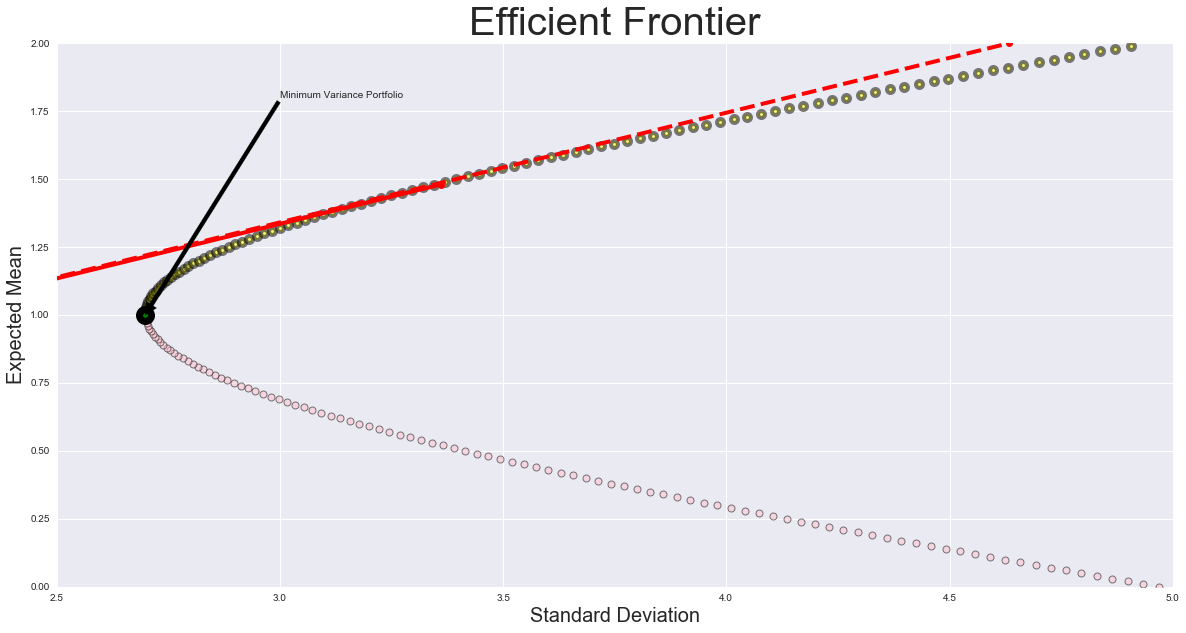

In [135]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.figure(figsize = (20,10))
plt.xlabel('Standard Deviation', fontsize=20)
plt.ylabel('Expected Mean', fontsize=20)
plt.title( 'Efficient Frontier', fontsize=40 )

Exp_Return_Std_dev_Rmv = [0,Std_deviation_Portfolio_with_RiskfreeAsset(2,0.13)]
Intercept = [ 0.13,2]
plt.plot(Exp_Return_Std_dev_Rmv, Intercept, color='red', marker='o',linestyle='dashed',linewidth=4)


Expected_Return_Tangent_Portfolio = [0,3.36]
st = [0.13,1.48,]
plt.plot(Expected_Return_Tangent_Portfolio,st, color='red', marker='o',linewidth=4)


plt.xlim(2.5,5)
plt.ylim(0,2)

df_exp_front[df_exp_front["Exp_Return"] >= 1]
plt.scatter(df_exp_front[df_exp_front["Exp_Return"] >= 1].Exp_Return_Std_dev_Rmv.values,df_exp_front[df_exp_front["Exp_Return"] >= 1].Exp_Return.values,c='yellow',edgecolor='black',linewidth=4, alpha = 0.5)
plt.scatter(df_exp_front[df_exp_front["Exp_Return"] < 1].Exp_Return_Std_dev_Rmv.values,df_exp_front[df_exp_front["Exp_Return"] < 1].Exp_Return.values,c='pink',edgecolor='black',linewidth=1, alpha = 0.5)
#plt.plot(Exp_Return_Std_dev_Rmv, Intercept, color='blue', marker='o',linestyle='dashed',linewidth=4)
plt.scatter(minimum_variance.Exp_Return_Std_dev_Rmv.values,minimum_variance.Exp_Return.values,c='green',edgecolor='black',linewidth=12)
plt.annotate('Minimum Variance Portfolio', xy=(2.698,1), xytext=(3.0, 1.8), arrowprops=dict(facecolor='black', shrink=20.15))

> ### 18. Explain economic significance and relevance of the minimum -variance frontier to an investor
- Minimum variance portfolio is the portfolio with the smallest variance ( std. Deviation ) among all the possible portfolios possibilities curve. On the portfolio possibilities curve, the minimum variance portfolio represents the left msot point on the curve.

> ### 19. Explain the economic significance and relevance of the efficient frontier to an investor
- All portfolios lying on the inside of the curve are inefficient. All rational investors prefer the portfolio on the upper side of the curve.
- All portfolio on the upper side has minimum risk of all the portfolios with the same expected return. 
- Maximum expected return for all portfolios with the same risk

> ### 20. Explain the economic significance and relevance of the tangency portfolio to an investor
>> When the risk free asset is combined with the risky portfolio P, the efficient frontier becomes a line with:
- Intercept equal to the risk free rate and 
- the slope equal to the reward to risk ratio for the risky portfolio

>> The point of tangency , portfolio P, is known as the market portfolio. 
This portfolio contains all available risky assets in proportion to their total market values
- If all investors agree on the efficient frontier, they will hold a combination of the market portfolio and the risk-free asset. 
- Risk-Averse investors will create lower risk portfolios by lending.
- More Risk-tolerant investors will increase portfolio return by borrowing at the risk-free rate.